In [ ]:
# analyse the distribution of augmentation over conversations

In [2]:
import json
# example_data
data_dir = "test_data_with_snippets_enrich_mha_pred.json"
data = json.load(open(data_dir))

In [2]:
max_turns = 0
x = list(range(10))
y = [0] * len(x)

for conv in data:
    conv_len = len(conv['turns'])
    middle = round(conv_len / 2)
    for idx, turn in enumerate(conv['turns']):
        if turn['enrich']:
            y[int(idx / conv_len * 10)] += 1


In [38]:
y

[71, 145, 94, 82, 38, 75, 39, 46, 31, 10]

In [39]:
max_turns = 0
x = list(range(10))
y = [0] * len(x)

for conv in data:
    conv_len = len(conv['turns'])
    middle = round(conv_len / 2)
    for idx, turn in enumerate(conv['turns']):
        if turn['enrich_pred']:
            y[int(idx / conv_len * 10)] += 1

In [40]:
y

[34, 92, 29, 24, 5, 14, 9, 10, 12, 1]

In [42]:
max_turns = 0
x = list(range(10))
y = [0] * len(x)

for conv in data:
    conv_len = len(conv['turns'])
    middle = round(conv_len / 2)
    for idx, turn in enumerate(conv['turns']):
        if turn['enrich_pred']:
            y[int(idx / conv_len * 10)] += 1

In [43]:
y

[203, 291, 141, 76, 23, 26, 9, 10, 4, 4]

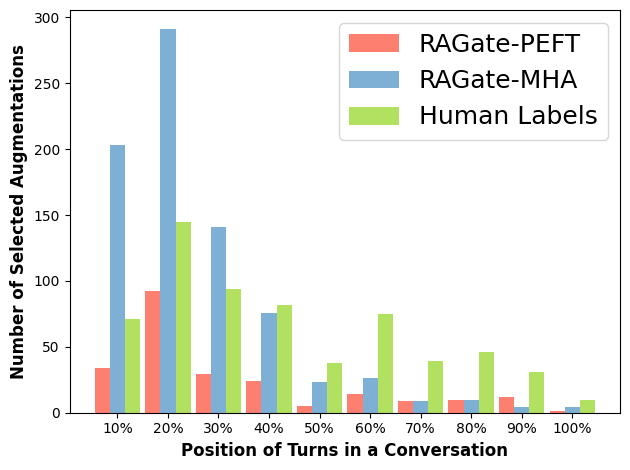

In [15]:
# draw a bar chart

import matplotlib.pyplot as plt

LLM_Pred = [34, 92, 29, 24, 5, 14, 9, 10, 12, 1]
MHA_Pred = [203, 291, 141, 76, 23, 26, 9, 10, 4, 4]
Human_labels = [71, 145, 94, 82, 38, 75, 39, 46, 31, 10]

# set colors of the bars
colors = ["#fd7f6f", "#7eb0d5", "#b2e061"]

x = list(range(10))
fig, ax = plt.subplots()
bar_width = 0.3
plt.bar(x, LLM_Pred, bar_width, label='RAGate-PEFT', color=colors[0])
plt.bar([i + bar_width for i in x], MHA_Pred, bar_width, label='RAGate-MHA', color=colors[1])
plt.bar([i + 2 * bar_width for i in x], Human_labels, bar_width, label='Human Labels', color=colors[2])

plt.xlabel('Position of Turns in a Conversation', fontsize=12, fontweight='bold')
plt.ylabel('Number of Selected Augmentations', fontsize=12, fontweight='bold')

plt.xticks([i + bar_width for i in x], ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
# set the legend size
plt.legend(fontsize=18)
plt.tight_layout()
plt.savefig('augmentation_distribution.pdf')
plt.show()


In [43]:
# service = set()

# for conv in data:
#     for turn in conv['turns']:
#         service.add(turn['frames'][0]['service'][:-2])

service = ['Messaging',
 'RentalCars',
 'RideSharing',
 'Events',
 'Buses',
 'Media',
 'Weather',
 'Services',
 'Payment',
 'Music',
 'Restaurants',
 'Trains',
 'Movies',
 'Calendar',
 'Flights',
 'Hotels',
 'Homes',
 'Travel',
 'Alarm']

augmentation_count = [0] * len(service)
for conv in data:
    for turn in conv['turns']:
        service_idx = service.index(turn['frames'][0]['service'][:-2])
        if turn['enrich_pred']:
            augmentation_count[service_idx] += 1

In [34]:
augmentation_count = [0] * len(service)
for conv in data:
    for turn in conv['turns']:
        service_idx = service.index(turn['frames'][0]['service'][:-2])
        if turn['enrich']:
            augmentation_count[service_idx] += 1

In [35]:
augmentation_count

[0, 54, 4, 63, 33, 37, 15, 45, 1, 44, 27, 34, 40, 5, 38, 48, 21, 119, 3]

In [44]:
augmentation_count

[0, 56, 11, 67, 57, 54, 40, 74, 3, 36, 22, 59, 60, 9, 80, 67, 17, 74, 1]

In [38]:
augmentation_count = [0] * len(service)
for conv in data:
    for turn in conv['turns']:
        service_idx = service.index(turn['frames'][0]['service'][:-2])
        if turn['enrich_pred']:
            augmentation_count[service_idx] += 1

In [39]:
augmentation_count

[0, 16, 0, 20, 0, 10, 2, 37, 0, 14, 8, 0, 10, 0, 3, 6, 13, 91, 0]

In [40]:
service

['Messaging',
 'RentalCars',
 'RideSharing',
 'Events',
 'Buses',
 'Media',
 'Weather',
 'Services',
 'Payment',
 'Music',
 'Restaurants',
 'Trains',
 'Movies',
 'Calendar',
 'Flights',
 'Hotels',
 'Homes',
 'Travel',
 'Alarm']

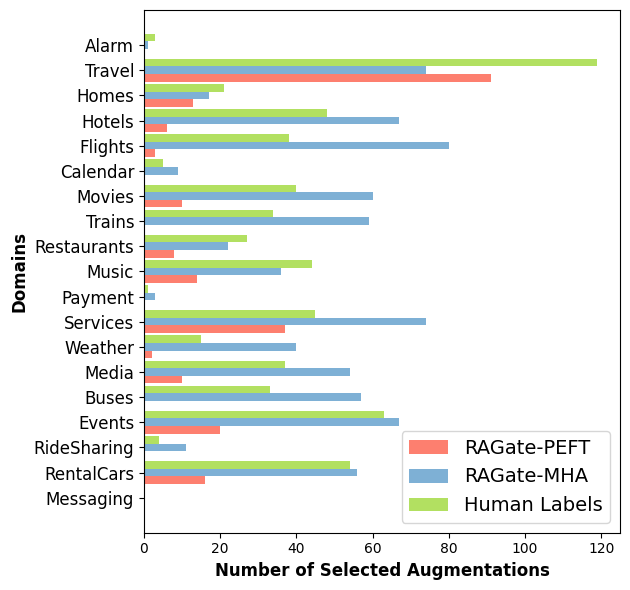

In [52]:
# horizontal bar chart
import matplotlib.pyplot as plt


LLM_aug = [0, 16, 0, 20, 0, 10, 2, 37, 0, 14, 8, 0, 10, 0, 3, 6, 13, 91, 0]
MHA_aug = [0, 56, 11, 67, 57, 54, 40, 74, 3, 36, 22, 59, 60, 9, 80, 67, 17, 74, 1]
Human_labels = [0, 54, 4, 63, 33, 37, 15, 45, 1, 44, 27, 34, 40, 5, 38, 48, 21, 119, 3]

# set colors of the bars
colors = ["#fd7f6f", "#7eb0d5", "#b2e061"]

# horizontal bar chart
fig, ax = plt.subplots()
# make the plot taller
fig.set_figheight(6)

bar_width = 0.3
x = list(range(len(service)))
plt.barh(x, LLM_aug, bar_width, label='RAGate-PEFT', color=colors[0])
plt.barh([i + bar_width for i in x], MHA_aug, bar_width, label='RAGate-MHA', color=colors[1])
plt.barh([i + 2 * bar_width for i in x], Human_labels, bar_width, label='Human Labels', color=colors[2])

plt.yticks([i + bar_width for i in x], service, fontsize=12)
plt.xlabel('Number of Selected Augmentations', fontsize=12, fontweight='bold')
plt.ylabel('Domains', fontsize=12, fontweight='bold')
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('augmentation_distribution_service.pdf')
plt.show()


In [53]:
# get the inputs for the user study

In [9]:
# aggregate the data for user study
import random
import pandas as pd
contexts = []
system_responses = []
retrieved_snippets = []
human_labels = []

for conv in data:
    context = ""
    for turn in conv['turns']:
        if turn['speaker'] == 'SYSTEM':
            contexts.append("context: " + context)
            system_responses.append("system_response: " + turn['utterance'])
            retrieved_snippets.append("knowledge_nippets: " + " ".join(turn['retrieved_snippets'][:3]))
            human_labels.append(turn['enrich'])
        context += turn['speaker'] + ": " + turn['utterance'] + " "

# randomly sample 50 index from the positive and negative samples

df = pd.DataFrame({'index': list(range(len(contexts))), 'Context': contexts, 'System Response': system_responses, 'Retrieved Snippets': retrieved_snippets, 'Human Labels': human_labels})

# sample 25 positive and 25 negative samples
positive_df = df[df['Human Labels'] == 1]
negative_df = df[df['Human Labels'] == 0]

positive_sample_idx = random.sample(range(len(positive_df)), 25)
negative_sample_idx = random.sample(range(len(negative_df)), 25)

positive_sample = positive_df.iloc[positive_sample_idx]
negative_sample = negative_df.iloc[negative_sample_idx]

sample_df = pd.concat([positive_sample, negative_sample])
# shuffle rows
# shuffle the DataFrame rows
sample_df = sample_df.sample(frac = 1)

# remove human labels
sample_df = sample_df.drop(columns=['Human Labels'])
sample_df.to_csv('user_study_data_balanced.csv', index=False)

In [19]:
# aggregate the data for user study
import random
import pandas as pd
contexts = []
system_responses = []
retrieved_snippets = []
mha_labels = []

for conv in data:
    context = ""
    for turn in conv['turns']:
        if turn['speaker'] == 'SYSTEM':
            contexts.append("context: " + context)
            system_responses.append("system_response: " + turn['utterance'])
            retrieved_snippets.append("knowledge_nippets: " + " ".join(turn['retrieved_snippets'][:3]))
            mha_labels.append(turn['enrich_pred'])
        context += turn['speaker'] + ": " + turn['utterance'] + " "

# randomly sample 50 index from the positive and negative samples

df = pd.DataFrame({'index': list(range(len(contexts))), 'Context': contexts, 'System Response': system_responses, 'Retrieved Snippets': retrieved_snippets, 'mha Labels': mha_labels})

# sample 25 positive and 25 negative samples
positive_df = df[df['mha Labels'] == 1]
# negative_df = df[df['Human Labels'] == 0]

positive_sample_idx = random.sample(range(len(positive_df)), 50)
# negative_sample_idx = random.sample(range(len(negative_df)), 25)

positive_sample = positive_df.iloc[positive_sample_idx]
# negative_sample = negative_df.iloc[negative_sample_idx]

# sample_df = pd.concat([positive_sample, negative_sample])
# shuffle rows
# shuffle the DataFrame rows
sample_df = positive_sample
sample_df = sample_df.sample(frac = 1)

# remove human labels
# sample_df = sample_df.drop(columns=['Human Labels'])
sample_df.to_csv('user_study_data_mha_positive.csv', index=False)

In [20]:
# aggregate the labels for user study
import json
mha_data_dir = "../../data/SimpleTOD/processed/test_data_with_snippets_enrich_mha_pred.json"
mha_data = json.load(open(mha_data_dir))

llama_data_dir = "../../data/SimpleTOD/processed/test_data_with_snippets_enrich_llama_pred.json"
llama_data = json.load(open(llama_data_dir))

In [21]:
mha_labels = []
llama_labels = []
human_labels = []

for conv in mha_data:
    for turn in conv['turns']:
        if turn['speaker'] == 'SYSTEM':
            mha_labels.append(turn['enrich_pred'])

for conv in llama_data:
    for turn in conv['turns']:
        if turn['speaker'] == 'SYSTEM':
            llama_labels.append(turn['enrich_pred'])
            human_labels.append(turn['enrich'])

assert len(mha_labels) == len(llama_labels) == len(human_labels)

In [22]:
# get the index for the user study from csv file

import pandas as pd
df = pd.read_csv('user_study_data_mha_positive.csv')
sample_idx = df['index'].tolist()


mha_labels_sample = [mha_labels[i] for i in sample_idx]
llama_labels_sample = [llama_labels[i] for i in sample_idx]
human_labels_sample = [human_labels[i] for i in sample_idx]

df = pd.DataFrame({'index': sample_idx, 'MHA Labels': mha_labels_sample, 'PEFT Labels': llama_labels_sample, 'Human Labels': human_labels_sample})
df.to_csv('user_study_labels_mha_positive.csv', index=False)
